In [1]:
## Importação de Pacotes para o trabalho
import numpy as np
import pandas as pd
import datetime as dt
import time
import sys
import matplotlib.pyplot as plt
import sweetviz as sv
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import imblearn
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import xgboost
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from numpy import asarray # importando a funcao para criar registro para avaliar MP
from xgboost import XGBClassifier # importando o algoritmo
from xgboost import XGBRegressor
from numpy import mean # pacote de computacao matematica
from numpy import std  # pacote de computacao matematica
from sklearn.model_selection import cross_val_score #importando a funcao de treinamento e teste da MP com validacao cruzada
from sklearn.model_selection import RepeatedStratifiedKFold # importando funcao de validacao cruzada
from sklearn.datasets import make_classification #importando a funcao de criacao de dados sintetico
from sklearn.datasets import make_hastie_10_2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')





In [72]:
import plotly.graph_objects as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactvity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

In [2]:
df = pd.read_excel('Vendas.xlsx')

In [3]:
df

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,65056,2019-12-01,Iguatemi Campinas,Calça,2,170,340
1,65501,2019-12-03,Iguatemi Campinas,Camisa,3,100,300
2,65707,2019-12-04,Iguatemi Esplanada,Bermuda,1,150,150
3,65750,2019-12-04,Iguatemi Campinas,Bermuda,4,150,600
4,65810,2019-12-05,Center Shopping Uberlândia,Chinelo,1,60,60
5,65830,2019-12-05,Iguatemi Campinas,Gorro,2,80,160
6,65859,2019-12-05,Iguatemi Campinas,Bermuda,4,150,600
7,65893,2019-12-05,Bourbon Shopping SP,Gorro,3,80,240
8,66029,2019-12-06,Iguatemi Campinas,Cinto,2,200,400
9,66040,2019-12-06,Bourbon Shopping SP,Chinelo,1,60,60


# Análise Estatistico

In [4]:
# Informações sobre as colunas
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Código Venda    42 non-null     int64         
 1   Data            42 non-null     datetime64[ns]
 2   ID Loja         42 non-null     object        
 3   Produto         42 non-null     object        
 4   Quantidade      42 non-null     int64         
 5   Valor Unitário  42 non-null     int64         
 6   Valor Final     42 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.4+ KB


None

In [5]:
# Visualize as primeiras linhas do DataFrame
display(df.head())

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,65056,2019-12-01,Iguatemi Campinas,Calça,2,170,340
1,65501,2019-12-03,Iguatemi Campinas,Camisa,3,100,300
2,65707,2019-12-04,Iguatemi Esplanada,Bermuda,1,150,150
3,65750,2019-12-04,Iguatemi Campinas,Bermuda,4,150,600
4,65810,2019-12-05,Center Shopping Uberlândia,Chinelo,1,60,60


In [12]:
# Resumo estatístico
df.describe()

,Código Venda,Quantidade,Valor Unitário,Valor Final
count,42.000000,42.000000,42.000000,42.000000
mean,67550.047619,2.142857,124.761905,275.000000
std,1463.171779,1.138493,46.708128,187.645878
min,65056.000000,1.000000,60.000000,60.000000
25%,66256.000000,1.000000,80.000000,152.500000
50%,67520.000000,2.000000,100.000000,200.000000
75%,69075.250000,3.000000,170.000000,385.000000
max,69917.000000,5.000000,200.000000,850.000000


In [13]:
display(df.tail())

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
37,69286,2019-12-22,Iguatemi Campinas,Gorro,2,80,160
38,69676,2019-12-24,Bourbon Shopping SP,Gorro,4,80,320
39,69714,2019-12-24,Center Shopping Uberlândia,Cinto,2,200,400
40,69730,2019-12-24,Bourbon Shopping SP,Gorro,2,80,160
41,69917,2019-12-25,Iguatemi Campinas,Calça,2,170,340


In [14]:
df.shape

(42, 7)

In [9]:
#Avaliar o período dos dados coletados
inicio = pd.to_datetime(df['Data']).dt.date.min()
fim = pd.to_datetime(df['Data']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2019-12-01 Até: 2019-12-25


In [20]:
df['Produto'].value_counts()

Camisa     12
Gorro       9
Calça       7
Cinto       6
Bermuda     5
Chinelo     3
Name: Produto, dtype: int64

In [24]:
df[["Valor Unitário", "Produto"]].value_counts()

Valor Unitário  Produto
100             Camisa     12
80              Gorro       9
170             Calça       7
200             Cinto       6
150             Bermuda     5
60              Chinelo     3
dtype: int64

In [28]:
df[["ID Loja", "Produto","Valor Unitário", "Quantidade", "Valor Final"]].value_counts()

ID Loja                     Produto  Valor Unitário  Quantidade  Valor Final
Iguatemi Esplanada          Camisa   100             1           100            3
Iguatemi Campinas           Calça    170             1           170            2
                                                     2           340            2
                            Gorro    80              1           80             2
                                                     2           160            2
                            Bermuda  150             4           600            2
Bourbon Shopping SP         Chinelo  60              1           60             2
                            Camisa   100             2           200            2
Iguatemi Esplanada          Camisa   100             5           500            1
                                                     3           300            1
                                                     2           200            1
                     

In [30]:
# Contar o número de linhas e colunas do DataFrame:
print("Número de linhas:", df.shape[0])
print("Número de colunas:", df.shape[1])


Número de linhas: 42
Número de colunas: 7


# Tratamento de dados
- Limpeza de dados

In [31]:
df.isnull().sum()

Código Venda      0
Data              0
ID Loja           0
Produto           0
Quantidade        0
Valor Unitário    0
Valor Final       0
dtype: int64

In [32]:
# Remover linhas com valores faltantes
df.dropna(inplace=True)

In [33]:
# Renomear uma coluna - Caso voce for mudar nome de aluma coluna
#df.rename(columns={'nomeAntigo' : 'nomeNovo'}, inplace=True)

In [34]:
# Filtra dados com base m codificação
df_filtrado = df[df['Valor Final'] >100]

In [37]:
df_filtrado

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,65056,2019-12-01,Iguatemi Campinas,Calça,2,170,340
1,65501,2019-12-03,Iguatemi Campinas,Camisa,3,100,300
2,65707,2019-12-04,Iguatemi Esplanada,Bermuda,1,150,150
3,65750,2019-12-04,Iguatemi Campinas,Bermuda,4,150,600
5,65830,2019-12-05,Iguatemi Campinas,Gorro,2,80,160
6,65859,2019-12-05,Iguatemi Campinas,Bermuda,4,150,600
7,65893,2019-12-05,Bourbon Shopping SP,Gorro,3,80,240
8,66029,2019-12-06,Iguatemi Campinas,Cinto,2,200,400
10,66240,2019-12-07,Bourbon Shopping SP,Bermuda,3,150,450
13,66404,2019-12-08,Center Shopping Uberlândia,Calça,5,170,850


In [43]:
# Criar uma nova coluna com base em cálculos
df['Resultado_Vendas'] = df['Quantidade'] * df['Valor Final']
df

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Resultado_Vendas
0,65056,2019-12-01,Iguatemi Campinas,Calça,2,170,340,680
1,65501,2019-12-03,Iguatemi Campinas,Camisa,3,100,300,900
2,65707,2019-12-04,Iguatemi Esplanada,Bermuda,1,150,150,150
3,65750,2019-12-04,Iguatemi Campinas,Bermuda,4,150,600,2400
4,65810,2019-12-05,Center Shopping Uberlândia,Chinelo,1,60,60,60
5,65830,2019-12-05,Iguatemi Campinas,Gorro,2,80,160,320
6,65859,2019-12-05,Iguatemi Campinas,Bermuda,4,150,600,2400
7,65893,2019-12-05,Bourbon Shopping SP,Gorro,3,80,240,720
8,66029,2019-12-06,Iguatemi Campinas,Cinto,2,200,400,800
9,66040,2019-12-06,Bourbon Shopping SP,Chinelo,1,60,60,60


# Análise de Dados e Visualização

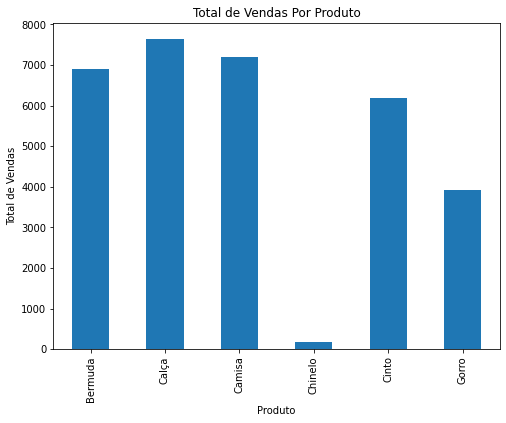

In [48]:
# Gráfico de Barras - Total de Vendas por Produto:
# Agrupar por produto e calcular a soma das vendas
vendas_por_produtos = df.groupby('Produto')['Resultado_Vendas'].sum()

# Criar um gráfico de barras
vendas_por_produtos.plot(kind='bar', figsize=(8, 6))
plt.title('Total de Vendas Por Produto')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.show()


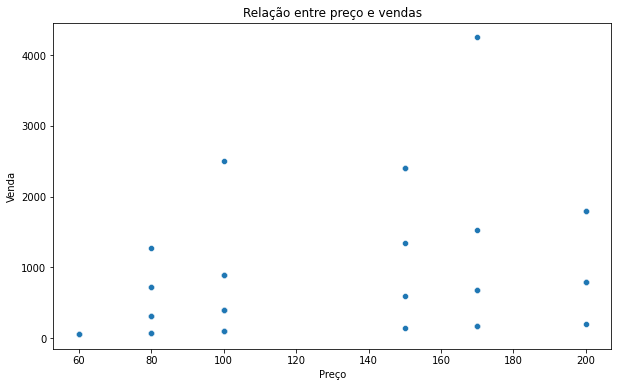

In [52]:
# Gráfico de Dispersão - Relação entre Preço e Vendas:
# Criar um gráfico de dispersão

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor Unitário', y='Resultado_Vendas', data=df)
plt.title('Relação entre preço e vendas')
plt.xlabel('Preço')
plt.ylabel('Venda')
plt.grid=True
plt.show()

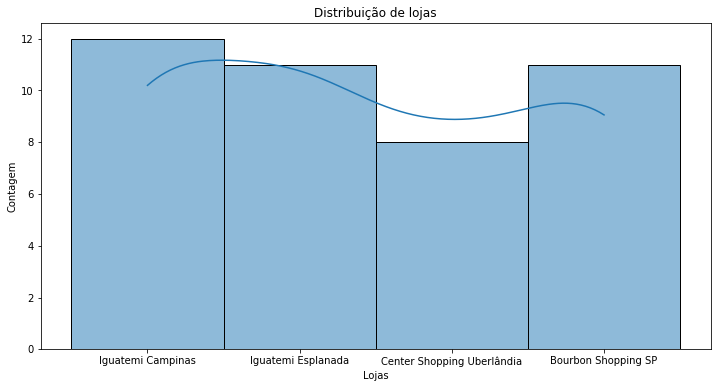

In [56]:
#Histograma - Distribuição de Idades dos Clientes:
plt.figure(figsize=(12, 6))
sns.histplot(df['ID Loja'], bins=20, kde=True)
plt.title('Distribuição de lojas')
plt.xlabel('Lojas')
plt.ylabel('Contagem')
plt.show()

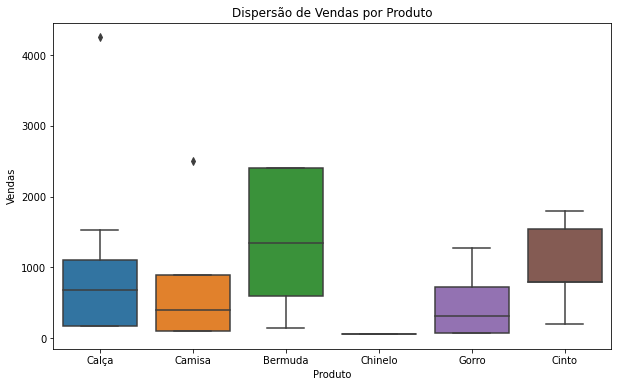

In [58]:
# Box Plot - Visualizar a Dispersão de Vendas por Categoria de Produto:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Produto', y='Resultado_Vendas', data=df)
plt.title('Dispersão de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.show()

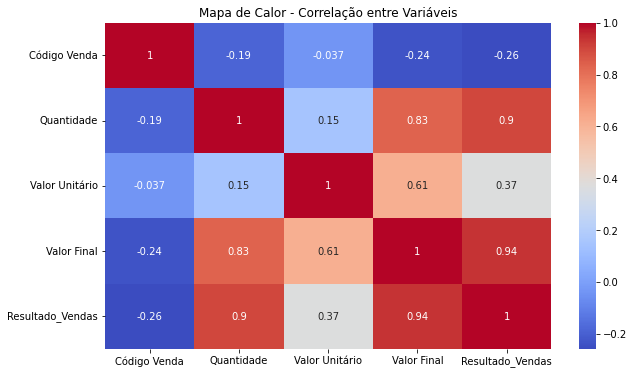

In [59]:
# Mapa de Calor - Correlação entre Variáveis:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

In [79]:
import cufflinks as cf
import plotly.graph_objects as go
cf.go_offline()
df.iplot()



In [78]:
df['Produto'].iplot(kind='bar', xTitle='Vendas', yTitle='Produtos', title='Gráfico de Vendas')


In [87]:
# Exemplo de personalização de gráfico de barras
#fig = df['Coluna_de_Vendas'].iplot(kind='bar', xTitle='Data', yTitle='Vendas', title='Gráfico de Vendas', colors=['blue'])

# Exemplo de personalização de gráfico de dispersão
df.iplot(kind='scatter', x='Quantidade', y='Valor Unitário', mode='markers', text='Resultado_Vendas', xTitle='Valor Final', yTitle='Quantidade', title='Gráfico de Dispersão')


In [97]:

# Exemplo de personalização de gráfico de pizza
fig = df.iplot(kind='pie', labels='Produto', values='Quantidade', title='Gráfico de Pizza')


In [107]:
# Crie o gráfico de barras
fig = df['Valor Final'].iplot(kind='bar', xTitle='Vendas por Quantidade', yTitle='Valor Final', title='Gráfico de Vendas')

# Verifique se o gráfico foi criado com sucesso
if fig is not None:
    # Exporte o gráfico para um arquivo HTML
    fig.write_html('grafico_de_vendas.html')
else:
    print("O gráfico não foi criado com sucesso. Verifique os dados e as colunas.")

O gráfico não foi criado com sucesso. Verifique os dados e as colunas.


In [60]:
df.to_excel('Vendas_Tratadas.xlsx', index=False, engine='openpyxl')


In [63]:
df = df[df['Quantidade']!= "Data"]
display(df["Valor Final"].value_counts())
display(df["Valor Final"].value_counts(normalize=True).map("{:.1%}".format))

200    5
600    4
300    4
100    4
60     3
160    3
400    3
80     3
170    3
340    2
240    2
500    1
450    1
510    1
850    1
150    1
320    1
Name: Valor Final, dtype: int64

200    11.9%
600     9.5%
300     9.5%
100     9.5%
60      7.1%
160     7.1%
400     7.1%
80      7.1%
170     7.1%
340     4.8%
240     4.8%
500     2.4%
450     2.4%
510     2.4%
850     2.4%
150     2.4%
320     2.4%
Name: Valor Final, dtype: object

In [64]:
# verificar se temos valores vazios ou valores reconhecidos em formato errado
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Código Venda      42 non-null     int64         
 1   Data              42 non-null     datetime64[ns]
 2   ID Loja           42 non-null     object        
 3   Produto           42 non-null     object        
 4   Quantidade        42 non-null     int64         
 5   Valor Unitário    42 non-null     int64         
 6   Valor Final       42 non-null     int64         
 7   Resultado_Vendas  42 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.0+ KB
None
Index(['Código Venda', 'Data', 'ID Loja', 'Produto', 'Quantidade',
       'Valor Unitário', 'Valor Final', 'Resultado_Vendas'],
      dtype='object')


# Machine Learning IA  
- Preparar a base de dados para a inteligencia artificial

In [65]:
from sklearn.preprocessing import LabelEncoder
# vai transformar as colunas de texto em números, ex: profissoes vai sair de cientista, professor, mecanico, etc para 0, 1, 2, etc
codificador = LabelEncoder()
# só não aplicamos na coluna de score_credito que é o nosso objetivo
for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "ID Loja":
        tabela[coluna] = codificador.fit_transform(tabela[coluna])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Código Venda      42 non-null     int64         
 1   Data              42 non-null     datetime64[ns]
 2   ID Loja           42 non-null     object        
 3   Produto           42 non-null     object        
 4   Quantidade        42 non-null     int64         
 5   Valor Unitário    42 non-null     int64         
 6   Valor Final       42 non-null     int64         
 7   Resultado_Vendas  42 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.0+ KB


In [129]:
# Separar os dados em variáveis independentes (X) e variável dependente (y)
X = df[['Data']]
y = df['Valor Final']

In [130]:
# Treinar e Testar os Dados 

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=1)

In [131]:
# Criar um modelo de IA, Score_credito : good(bom), standard(medio),
# Arvore de decisao
from sklearn.ensemble import RandomForestClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier


modelo_arvoredecisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

# treinando os modelos
modelo_arvoredecisao.fit(X_treino, y_treino)
modelo_knn.fit(X_treino, y_treino)

KNeighborsClassifier()

In [135]:
from sklearn.model_selection import train_test_split

# Escolha os recursos (variáveis independentes) que você deseja usar para prever as vendas
X = df[['Quantidade', 'Valor Final']]  # Substitua pelos nomes reais das colunas de recursos

# Escolha a variável alvo (vendas)
y = df['Valor Final']  # Substitua pelo nome real da coluna de vendas

# Divida os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
from sklearn.linear_model import LinearRegression

# Crie o modelo de regressão linear
model = LinearRegression()

# Treine o modelo nos dados de treinamento
model.fit(X_treino, y_treino)


LinearRegression()

In [137]:
from sklearn.metrics import mean_squared_error, r2_score

# Faça previsões nos dados de teste
y_pred = model.predict(X_teste)

# Calcule o MSE
mse = mean_squared_error(y_teste, y_pred)

# Calcule o R²
r2 = r2_score(y_teste, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 1.1219355096476612e-27
R²: 1.0


In [142]:
# Suponha que você tenha novos dados em um DataFrame 'novos_dados'
novas_previsoes = model.predict(df[['Valor Unitário', 'Resultado_Vendas']])

# As previsões estão contidas na variável 'novas_previsoes'
novas_previsoes

array([ 680.,  900.,  150., 2400.,   60.,  320., 2400.,  720.,  800.,
         60., 1350.,   80.,  100., 4250., 1530., 1800.,  400., 1800.,
        170.,  720.,   60.,  900., 2500.,  170.,  100.,  400.,  600.,
        170.,   80.,  400.,   80.,  100.,  900.,  100.,  800.,  400.,
        200.,  320., 1280.,  800.,  320.,  680.])

In [143]:
df.to_excel('Vendas_Tratadas.xlsx', index=False, engine='openpyxl')
